# Time Series

**We will be using the Alcohol_Sales.csv data set for this part of the lab. The data set contains the monthly
number of bottles sold from 1992 - 2019.**

In [24]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**1. The date information is in a non-standard format. You will need to convert it to a datetime. The
function strptime() is one way to do this as shown in this link.**

In [6]:
df = pd.read_csv('Alcohol_Sales.csv')
df['DATE'] = pd.to_datetime(df['DATE'], format='%B-%y')

print(df.head())
print(df.info())

        DATE  units_sold
0 1992-01-01        3459
1 1992-02-01        3458
2 1992-03-01        4002
3 1992-04-01        4564
4 1992-05-01        4221
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        325 non-null    datetime64[ns]
 1   units_sold  325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB
None


**2. Make the date value an index using set_index()**

In [8]:
df.set_index('DATE', inplace = True)

**3. Plot the number of units sold vs time. Answer the following:**

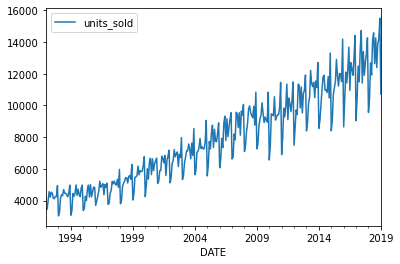

In [12]:
df.plot()
plt.show()

**a. Are data independent?**

No, there is a clear positive relation between them.

**b. Is the data stationary?**

The data currently is not stationery.

**4. Make the data stationary using differencing. This link shows several methods for differencing.
Use shift().**

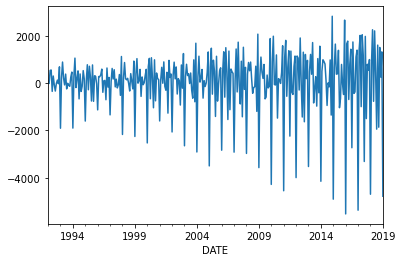

In [16]:
df['Differenced'] = df['units_sold'] - df['units_sold'].shift(1)
df['Differenced'].plot()
plt.show()

**5. The link above provides a function for determining if the differencing made the data stationary. I have reproduced it here, removing the hard coded variable name. Use this function to test whether the series is stationary.**

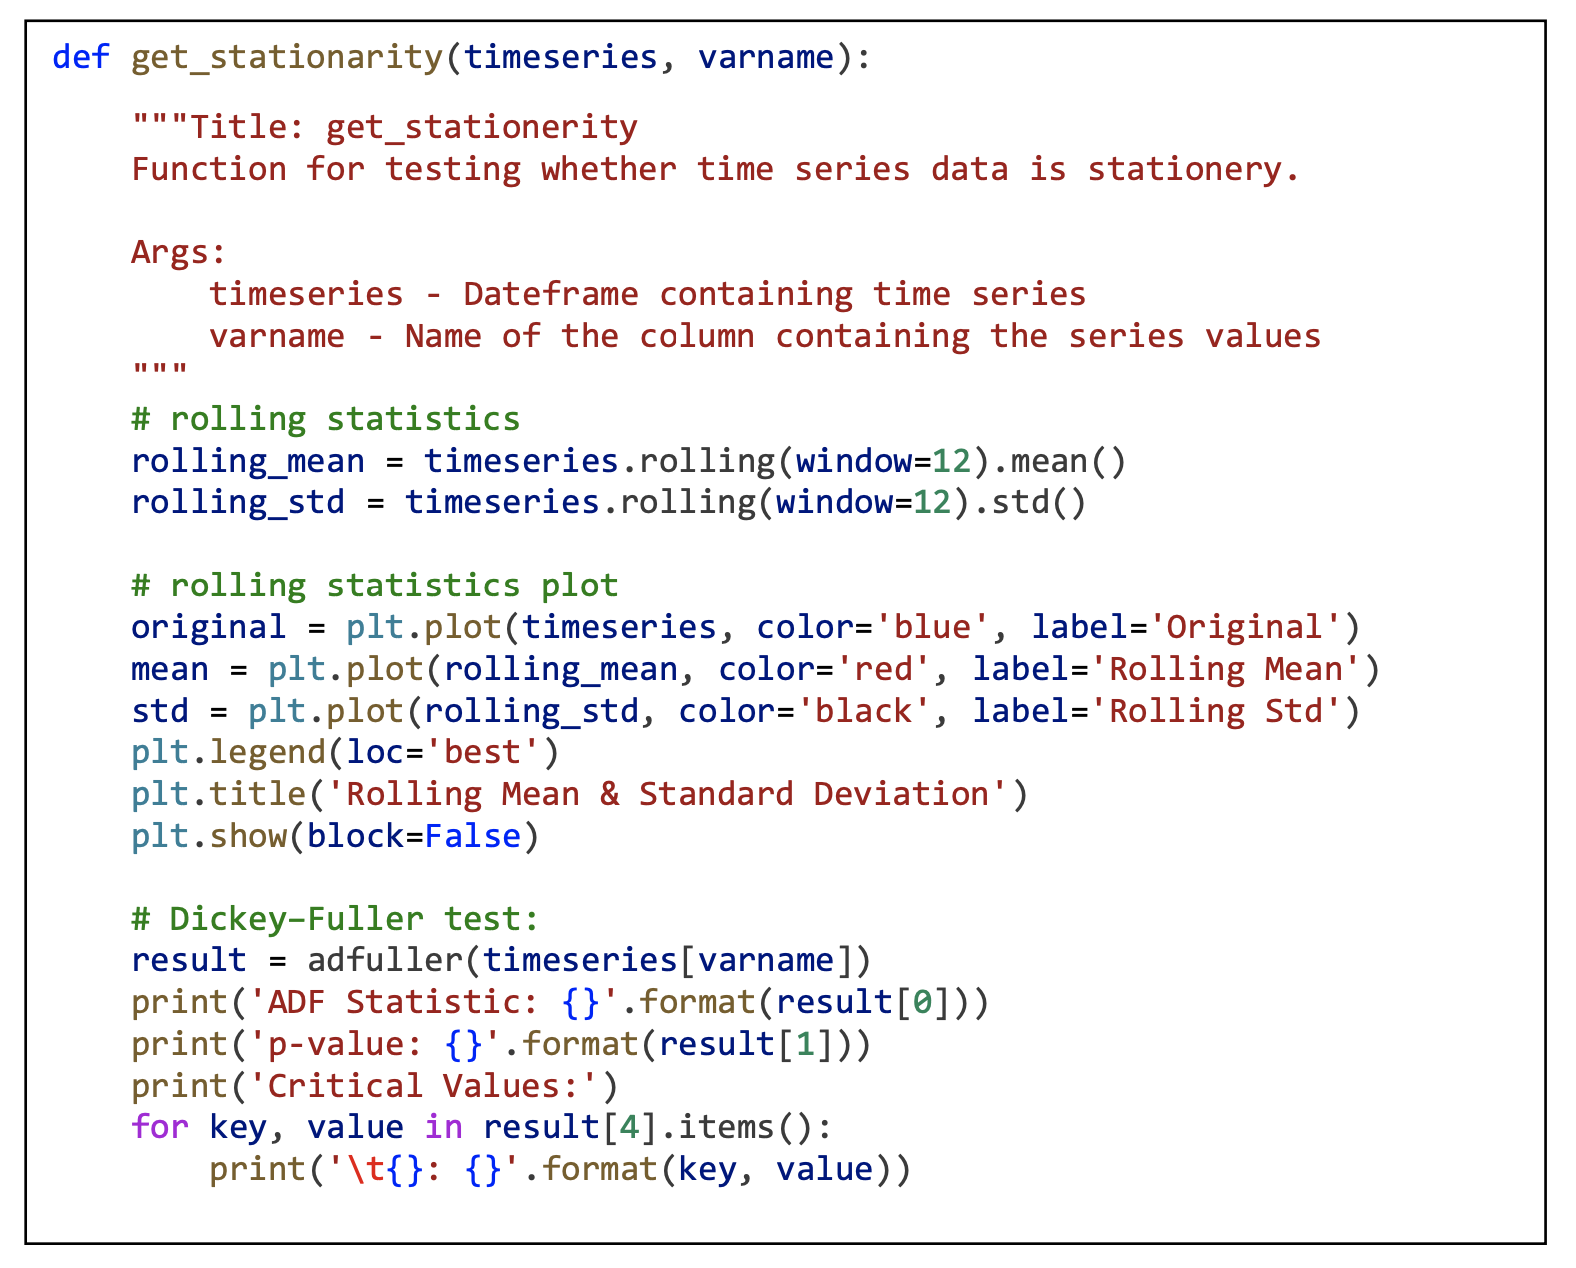

In [17]:
# Define the get_stationarity function
def get_stationarity(timeseries, varname):
    """Title: get_stationarity
    Function for testing whether time series data is stationary.
    Args:
    timeseries - DataFrame containing time series
    varname - Name of the column containing the series values
    """
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Dickey–Fuller test:
    result = adfuller(timeseries[varname])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

**a. Did differencing make the data stationary?**

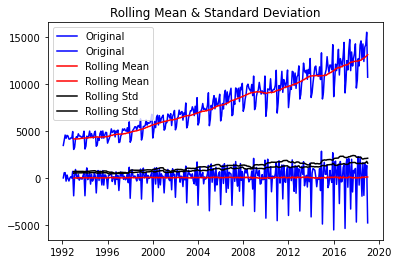

ADF Statistic: -4.365959619246053
p-value: 0.00034082849211700296
Critical Values:
	1%: -3.451621854687657
	5%: -2.870908950689806
	10%: -2.571761810613944


In [23]:
df = df.dropna()
get_stationarity(df, 'Differenced')

As the p-value is great smaller than 0.05, differencing did make the data stationary.

**b. Do you see another issue with the data? Hint: Think about the regression assumptions other
than independence.**

Heteroscedasticity (varying variance over time) or outliers may affect the analysis.

**6. Generate ACF and PACF plots of this data. For how to create the plots, see this link. The function plot_pacf is also available in statsmodels. Interpret the plots.**

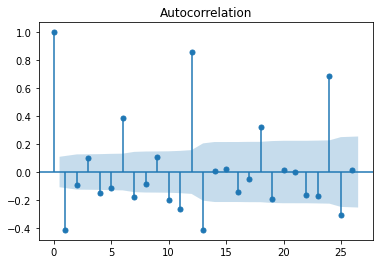

In [25]:
plot_acf(df['Differenced'].dropna())
plt.show()

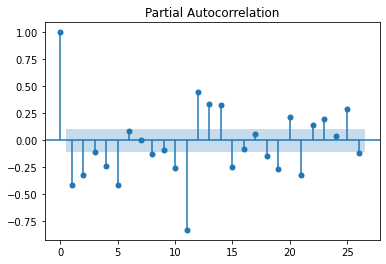

In [26]:
plot_pacf(df['Differenced'].dropna())
plt.show()

**a. Would a time series model be appropriate?**

As the ACF and PACF show significant autocorrelations at specific lags, a time series model like ARIMA could be appropriate.

**b. Is there a seasonal pattern to the series?**

Seasonal patterns are indicated by spikes at consistent intervals in the ACF/PACF plots. So the answer is yes.